dynamic-table-250322-cleaned.csv
mean-bikes-available.csv

In [62]:
# Library Imports.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Allows plots to appear directly in the notebook.
%matplotlib inline

#from patsy import dmatrices
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score 
from sklearn.preprocessing import PolynomialFeatures

In [31]:
# Print first few lines of mean bikes dataframe

df = pd.read_csv("mean-bikes-available.csv")
df.head()

,station_number,hour,weekend,mean_bikes_avail
0,2,0,False,10.953333
1,2,0,True,9.859155
2,2,1,False,11.375839
3,2,1,True,10.166667
4,2,2,False,11.382550


In [32]:
# Print mean for dataframe

df.mean_bikes_avail.mean()

12.813114873489246

In [33]:
# Print datatypes for dataframe

df.dtypes

station_number        int64
hour                  int64
weekend                bool
mean_bikes_avail    float64
dtype: object

In [34]:
# Examine correlations between different features of dataframe

df[['station_number', 'hour', 'weekend', 'mean_bikes_avail']].corr()

,station_number,hour,weekend,mean_bikes_avail
station_number,1.000000e+00,7.427845e-17,9.979994e-19,0.107843
hour,7.427845e-17,1.000000e+00,-7.776299e-19,-0.022725
weekend,9.979994e-19,-7.776299e-19,1.000000e+00,0.019898
mean_bikes_avail,1.078430e-01,-2.272484e-02,1.989760e-02,1.000000


<AxesSubplot:xlabel='station_number', ylabel='mean_bikes_avail'>

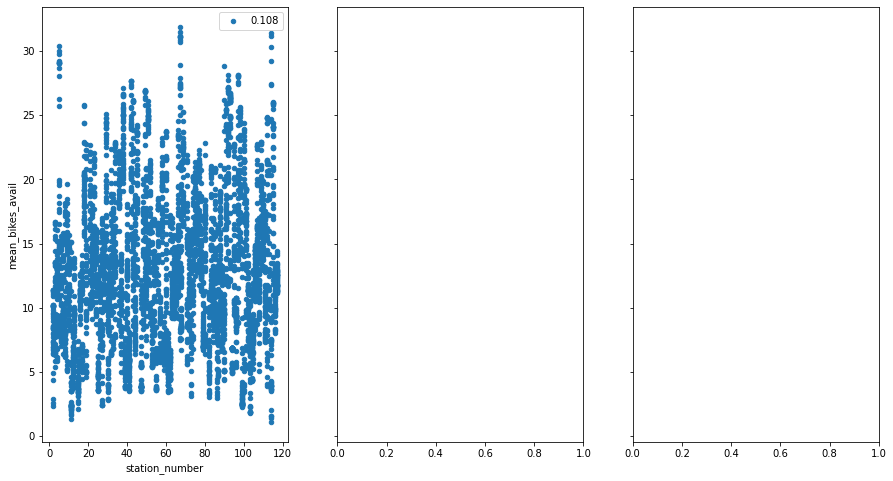

In [35]:
# Print scatter plots for station numbers againsts bike availability correlations

fig, axs = plt.subplots(1,3, sharey=True)
df.plot(kind='scatter', x='station_number', y='mean_bikes_avail', label="%.3f" % df[['station_number', 'mean_bikes_avail']].corr().to_numpy()[0,1], ax=axs[0], figsize=(15, 8))

In [36]:
# Create subset dataframe and then print X features and target features for comparison

df = df[df['weekend'] == False]
df = df[df['station_number'] == 2]
X = df[['hour']]
y = df.mean_bikes_avail

print("\nDescriptive features in X:\n", X)
print("\nTarget feature in y:\n", y)


Descriptive features in X:
     hour
0      0
2      1
4      2
6      3
8      4
10     5
12     6
14     7
16     8
18     9
20    10
22    11
24    12
26    13
28    14
30    15
32    16
34    17
36    18
38    19
40    20
42    21
44    22
46    23

Target feature in y:
 0     10.953333
2     11.375839
4     11.382550
6     11.409396
8     11.342282
10    11.353333
12    10.221477
14     6.426667
16     4.909677
18     2.371795
20     2.574194
22     2.897436
24     4.371795
26     7.297468
28     6.922619
30     6.796178
32     6.685185
34     6.484472
36     8.371069
38     8.956790
40     9.592593
42    10.197452
44    11.093960
46    11.241611
Name: mean_bikes_avail, dtype: float64


In [37]:
# Create linear regression model to predict y values from hour

features = ['hour']
linreg = LinearRegression().fit(X[features], y)

In [74]:
# Create polynomial model to order of 2 and fit it against the target feature by hours

poly = PolynomialFeatures(degree = 2)
X_poly_df = pd.DataFrame(X)

X_train_poly = poly.fit_transform(X_poly_df)
poly_reg = LinearRegression().fit(X_train_poly, y)

In [75]:
# Print out key information from linear model

print("Features: \n", features)
print("Coeficients: \n", linreg.coef_)
print("\nIntercept: \n", linreg.intercept_)

Features: 
 ['hour']
Coeficients: 
 [-0.04974782]

Intercept: 
 8.706648728768688


In [76]:
# Print out key information from polynomial model

print("Features: \n", features)
print("Coeficients: \n", poly_reg.coef_)
print("\nIntercept: \n", poly_reg.intercept_)

Features: 
 ['hour']
Coeficients: 
 [ 0.         -1.35799881  0.05688048]

Intercept: 
 13.503569038246264


In [77]:
# Create predictions from the linear model for each hour and display in dataframe

linreg_predictions = linreg.predict(X[['hour']])

print(X['hour'].values[0], y.values[0], linreg_predictions[0])
actual_vs_predicted = pd.concat([y, pd.DataFrame(linreg_predictions, columns=['Predicted'], index=y.index)], axis=1)
actual_vs_predicted

0 10.953333333333331 8.706648728768688


,mean_bikes_avail,Predicted
0,10.953333,8.706649
2,11.375839,8.656901
4,11.382550,8.607153
6,11.409396,8.557405
8,11.342282,8.507657
10,11.353333,8.457910
12,10.221477,8.408162
14,6.426667,8.358414
16,4.909677,8.308666
18,2.371795,8.258918


In [81]:
X[['hour']]

,hour
0,0
2,1
4,2
6,3
8,4
10,5
12,6
14,7
16,8
18,9


In [40]:
X_new = pd.DataFrame({'hour': [10]})
X_new.head()

,hour
0,10


In [41]:
linreg.predict(X_new)

array([8.20917053])

In [42]:
X_minmax = pd.DataFrame({'hour': [df.hour.min(), df.hour.max()]})
X_minmax.head()

,hour
0,0
1,23


In [43]:
# Check linear regression predictions for minimum and maximum values

predictions_minmax = linreg.predict(X_minmax)
predictions_minmax

array([8.70664873, 7.56244887])

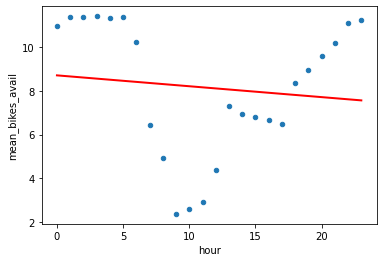

In [44]:
# Plot linear regression line against scatter plot

df.plot(kind='scatter', x='hour', y='mean_bikes_avail')
plt.plot(X_minmax, predictions_minmax, c='red', linewidth=2)

In [45]:
import pickle

In [46]:
actual_vs_predicted

,mean_bikes_avail,Predicted
0,10.953333,8.706649
2,11.375839,8.656901
4,11.382550,8.607153
6,11.409396,8.557405
8,11.342282,8.507657
10,11.353333,8.457910
12,10.221477,8.408162
14,6.426667,8.358414
16,4.909677,8.308666
18,2.371795,8.258918


In [47]:
# Read in dynamic availability data into dataframe

df_dynamic = pd.read_csv('dynamic-table-train.csv')

In [48]:
# Print out new datatypes

df_dynamic.dtypes

station_number      int64
hour                int64
date               object
weekend              bool
available_bikes     int64
dtype: object

In [49]:
# Create a subset dataframe for a specific station

df_dynamic_2 = df_dynamic.loc[df_dynamic['station_number'] == 2]

In [50]:
print(df_dynamic.shape)
print(df_dynamic_2.shape)

(491485, 5)
(4380, 5)


In [51]:
# Print out correlations for bike availability against dynamic data

df_dynamic_2[['hour', 'weekend', 'available_bikes']].corr()

,hour,weekend,available_bikes
hour,1.000000,-0.001819,-0.109489
weekend,-0.001819,1.000000,0.122721
available_bikes,-0.109489,0.122721,1.000000


In [52]:
X_2 = df_dynamic_2['hour']
y_2 = df_dynamic_2['available_bikes']

print("\nDescriptive features in X:\n", X_2)
print("\nTarget feature in y:\n", y_2)


Descriptive features in X:
 0       13
1       13
2       14
3       14
4       14
        ..
4375    13
4376    14
4377    14
4378    14
4379    14
Name: hour, Length: 4380, dtype: int64

Target feature in y:
 0       9
1       9
2       9
3       9
4       9
       ..
4375    1
4376    0
4377    0
4378    2
4379    1
Name: available_bikes, Length: 4380, dtype: int64


In [53]:
# Attempt linear regression using new X and y values

linreg_2 = LinearRegression().fit(X_2, y_2)

ValueError: Expected 2D array, got 1D array instead:
array=[13 13 14 ... 14 14 14].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [58]:
# Check that pickle dump works correctly

with open("mean-bikes-pickle3", 'wb') as f:
    pickle.dump(linreg,f)

In [59]:
# Check that loading pickle model works correctly

with open("mean-bikes-pickle3", 'rb') as f:
    model = pickle.load(f)

In [60]:
# Check that loaded model predictions match model predictions from within notebook still

predictions_minmax = linreg.predict(X_minmax)
predictions_minmax

array([8.70664873, 7.56244887])

In [61]:
loaded_model_predictions_minmax = model.predict(X_minmax)
loaded_model_predictions_minmax

array([8.70664873, 7.56244887])

# try different way

In [19]:
ds = pd.read_csv("mean-bikes-available.csv")
ds = ds[ds['weekend'] == False]
ds = ds[ds['station_number'] == 2]
del ds['station_number']
del ds['weekend']
ds.head()

,hour,mean_bikes_avail
0,0,10.953333
2,1,11.375839
4,2,11.382550
6,3,11.409396
8,4,11.342282


In [20]:
ds.dtypes

hour                  int64
mean_bikes_avail    float64
dtype: object

In [21]:
model = linear_model.LinearRegression()
model.fit(ds[['hour']],ds.mean_bikes_avail)

NameError: name 'linear_model' is not defined

In [22]:
ds = model.predict(np.array([6.5]).reshape(1,1))

NameError: name 'model' is not defined

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [213]:
model.coef_

array([-0.04974782])

In [214]:
model.intercept_

8.706648728768688

In [215]:
model.predict(5)

C:\Users\alex8\anaconda3\envs\bagelLexie\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got scalar array instead:
array=5.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.